# getting fake data

In [18]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle
X,Y =make_blobs(n_samples=300, centers=2, n_features=2, cluster_std=5, random_state=11)

# Visualizing the data

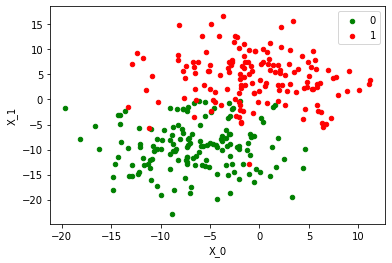

In [19]:
import matplotlib.pyplot as plt
from pandas import DataFrame

# Creating dataframe from array usinf dictionary method.
df= DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))

#creating groupby object to use in plotting.
grouped= df.groupby("label")

## Creating subplot objects for creating charts in future.
fig, ax= plt.subplots()

## Creating color key for labels.
colors = {1:"red",0:"green"}

##Using the group object to plot a chart for each group.

for key, group in grouped:
    
    group.plot(ax=ax, x="x", y="y", kind="scatter", label=key, color=colors[key])

plt.xlabel("X_0")
plt.ylabel("X_1")
plt.show()


# Splitting into batches

In [20]:
def nextBatch(X, y, batch_size):
    for i in np.arange(0, 300, batch_size):        
        yield (X[i:i+batch_size], Y[i:i+batch_size])
        

# Adding a column of ones. These will act as x^0.

In [21]:
X=np.c_[np.ones(X.shape[0]),X]
X.shape

(300, 3)

# Sigmoid function

In [22]:
def sigmoid(z):
    return(1/(1+np.exp(z)))

# dot product of features and model weighs

In [23]:
def h(X, w):
    return sigmoid(np.dot(X,w))

# Cost function binary cross entropy

In [24]:
def costF(w,X,Y):
    return -1*sum(Y*np.log(h(X, w)) + (1-Y)*(1-np.log(h(X,w))))

# Gradient of cost function

The end result contains the multiplicatin of two matrices is altered. The matrix on the left is transposed.
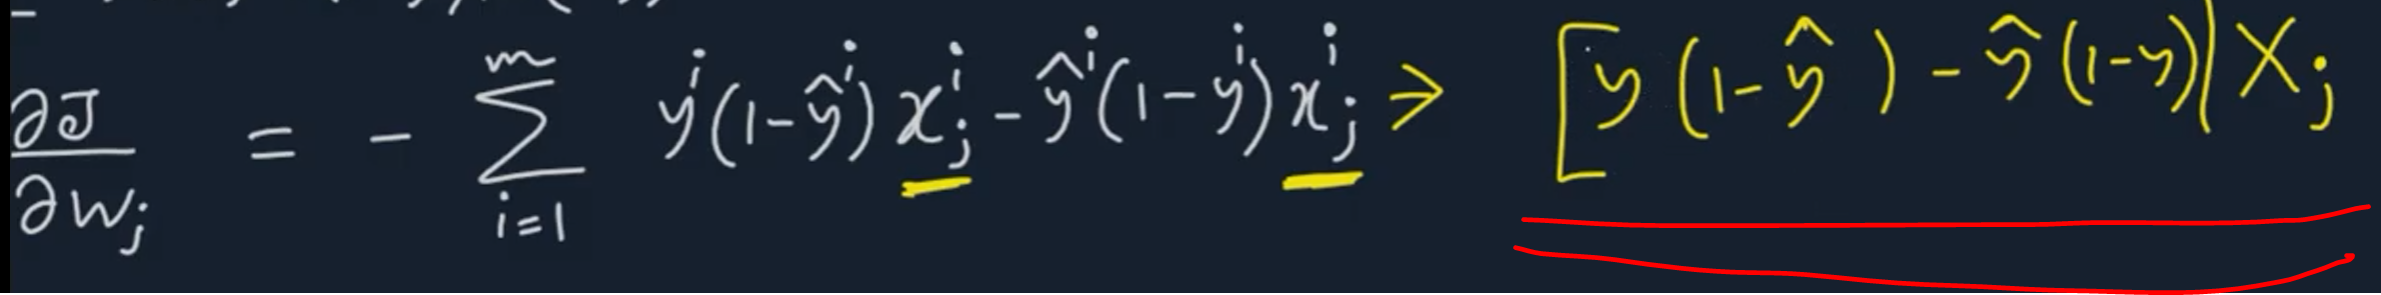


In [25]:
def gradient(w,X,Y):
    
    A= (-(1-Y)*h(X, w) + (Y)*(1-h(X,w)))    
    g= -1* np.dot(A.T,X)
    
    return(g)

In [26]:
def sgd(w_new, w_prev, lr, batch_size, epochs):
    
    X_,Y_=shuffle(X,Y, random_state=0)
    for i in range(epochs):
        epoch_loss=[]
        
        ##Data has been shuffled again as we want to avoid giving a sequential data tha might get stuck at a local minima.
        X_,Y_=shuffle(X,Y, random_state=0)
        
        for (batchX, batchY) in nextBatch(X_, Y_, batch_size):
            w_prev= w_new
            
            epoch_loss.append(costF(w_prev, batchX, batchY))
            gradients= gradient(w_prev, batchX, batchY)
                
            w_new= w_prev-lr*gradients        
        print("Total loss in this epoch",np.average(epoch_loss,))
    
    return w_new

In [27]:
# Initializing

W= np.random.uniform(size=(X.shape[1],))
W.shape

(3,)

# Training the model

In [28]:
print(W)
W= sgd(W, W, 0.009, 32, 200)
print(W)

[0.21643611 0.8246854  0.99965902]
Total loss in this epoch 25.60748376884884
Total loss in this epoch 147.57043782425984
Total loss in this epoch 269.5200457022404
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoc

<ipython-input-22-7dfcd430c0b5>:2: RuntimeWarning: overflow encountered in exp
  return(1/(1+np.exp(z)))
<ipython-input-24-660b79e3360c>:2: RuntimeWarning: divide by zero encountered in log
  return -1*sum(Y*np.log(h(X, w)) + (1-Y)*(1-np.log(h(X,w))))
<ipython-input-24-660b79e3360c>:2: RuntimeWarning: invalid value encountered in multiply
  return -1*sum(Y*np.log(h(X, w)) + (1-Y)*(1-np.log(h(X,w))))


Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in this epoch nan
Total loss in 

In [29]:
import numpy as np


In [30]:
print(np.arange(1,100,3))

[ 1  4  7 10 13 16 19 22 25 28 31 34 37 40 43 46 49 52 55 58 61 64 67 70
 73 76 79 82 85 88 91 94 97]
